In [291]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.base.tsa_model")
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels.tsa.base.tsa_model")

In [293]:
# Load data
data = pd.read_csv("mumbai-house-price-data.csv")

In [295]:
row,colm = data.shape[0],data.shape[1]
print(f"Intial Size {data.shape}")

Intial Size (71938, 15)


In [297]:
data.head(10)

,title,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors,latitude,longitude
0,Octave Parijas Horizon,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.244410,73.123253
1,Shakti Siyara Heights,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.257294,73.148872
2,Bhagwati Bhagwati Celeste,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.209026,73.081276
3,Relcon Ridhi Sidhi Sadan Of Ridhi Sidhi Co Ope...,51980000,1130,46000.000000,Ville Parle,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.097841,72.851158
4,J P Ruchita Bliss,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.420601,72.809319
5,Saras Destiny,4900320,720,6806.000000,Ulwe,Mumbai,Apartment,1,1,0,Unfurnished,0,1,18.967562,73.024956
6,Nexus Ratan Heritage,14000000,652,21472.392638,Jogeshwari,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.137762,72.860130
7,Aristocrat Guruprasad Divine Residency,16400255,565,29027.000000,Chembur,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.032211,72.895226
8,9 PBR 9 PBR,74998440,1770,42372.000000,Nerul,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.008259,73.013031
9,Prestige Bellanza Phase 2 Wing D E F At The Pr...,65900000,2600,25346.153846,Mulund,Mumbai,Apartment,4,5,0,Unfurnished,0,1,19.184473,72.940758


In [299]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,price,area,price_per_sqft,bedroom_num,bathroom_num,balcony_num,age,total_floors,latitude,longitude
count,7.193800e+04,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000
mean,1.951272e+07,943.251369,18489.401813,1.993884,2.082432,0.164336,2.247852,1.004740,19.171970,72.964390
std,3.320767e+07,645.881922,12691.857370,0.914573,0.854540,0.593804,4.230751,0.381272,0.465753,0.406728
min,3.200000e+04,123.000000,25.376685,0.000000,1.000000,0.000000,0.000000,1.000000,12.889899,72.435379
25%,6.524250e+06,595.000000,9230.769231,1.000000,2.000000,0.000000,0.000000,1.000000,19.071314,72.858833
50%,1.200000e+07,775.000000,16080.402010,2.000000,2.000000,0.000000,0.000000,1.000000,19.164281,72.916528
75%,2.150000e+07,1100.000000,23913.043478,3.000000,2.000000,0.000000,3.000000,1.000000,19.229946,73.021536
max,2.147484e+09,24109.000000,290000.000000,15.000000,15.000000,15.000000,57.000000,70.000000,72.868339,91.804413


/var/folders/b9/rs9ddddj2qb9xx5yj7h2b03w0000gn/T/ipykernel_14035/1770889675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='furnished', data=data, palette='pastel')


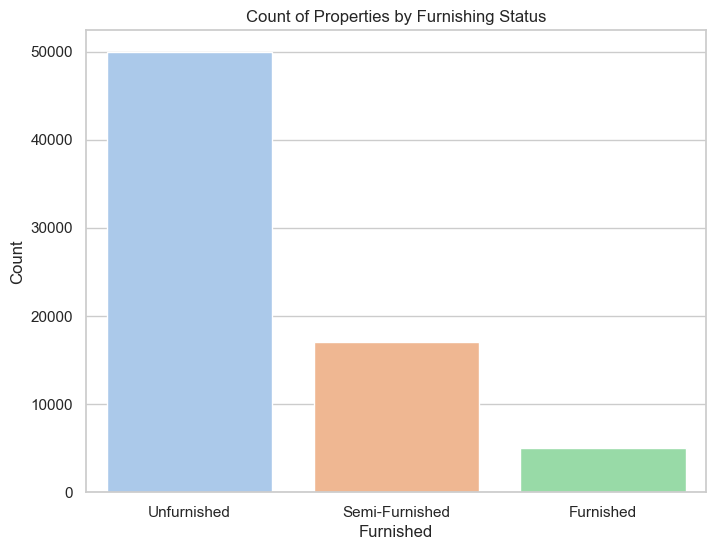

In [301]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Visualization : Count of properties by furnishing status
plt.figure(figsize=(8, 6))
sns.countplot(x='furnished', data=data, palette='pastel')
plt.title("Count of Properties by Furnishing Status")
plt.xlabel("Furnished")
plt.ylabel("Count")
plt.show()

In [302]:
# Function to format large numbers into human-readable format
def human_readable(num):
    if num >= 1e9:
        return num / 1e9
    elif num >= 1e6:
        return num / 1e6
    elif num >= 1e3:
        return num / 1e3
    else:
        return num

# Set Seaborn style
sns.set(style="whitegrid")

/var/folders/b9/rs9ddddj2qb9xx5yj7h2b03w0000gn/T/ipykernel_14035/345750102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_per_bedroom, x='bedroom_num', y='price', palette="coolwarm")


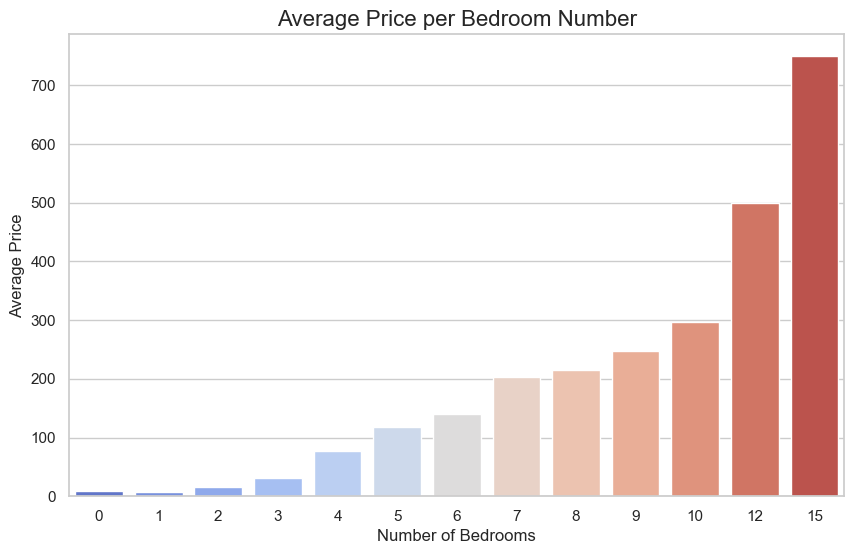

In [304]:
# Visualization 3: Average Price Per Bedroom Number
plt.figure(figsize=(10, 6))
price_per_bedroom = data.groupby('bedroom_num')['price'].mean().reset_index()
price_per_bedroom['price'] = price_per_bedroom['price'].apply(human_readable)
sns.barplot(data=price_per_bedroom, x='bedroom_num', y='price', palette="coolwarm")
plt.title("Average Price per Bedroom Number", fontsize=16)
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()


/var/folders/b9/rs9ddddj2qb9xx5yj7h2b03w0000gn/T/ipykernel_14035/1082193291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pricy_areas, x='locality', y='price', palette="magma")


Top 10 Pricy Areas:
                       locality       price
0                  Marine Drive  583.683417
1                    Churchgate  506.890406
2               Napean Sea Road  376.872165
3                  Malabar Hill  366.333947
4                Altamount Road  210.000000
5                     Pali Hill  189.335622
6                   Juhu Scheme  171.923077
7                   Peddar Road  160.833333
8  Oshiwara Police Station Road  160.000000
9                  Cuffe Parade  159.181810


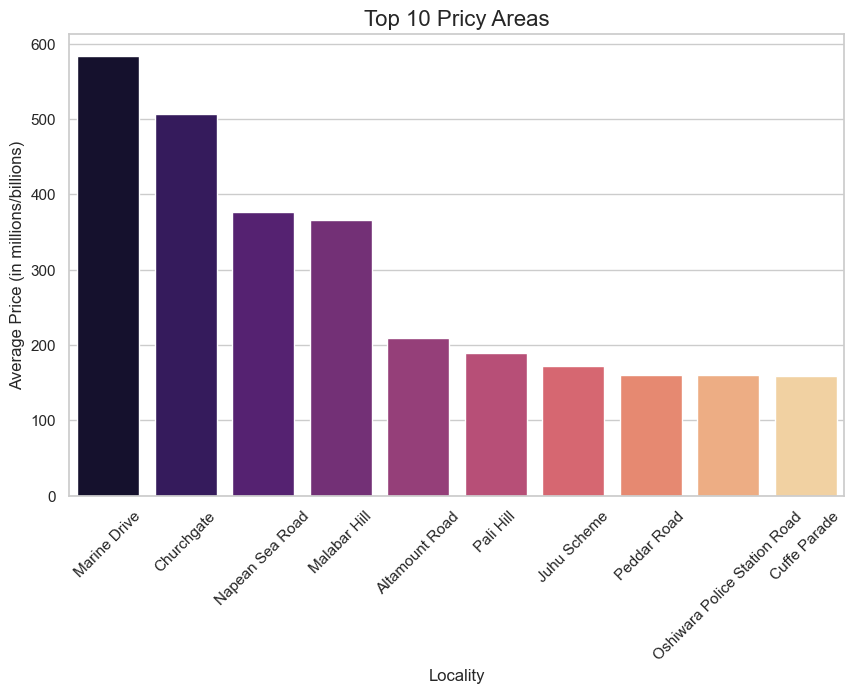

In [306]:
# Top 10 Pricy Areas
top_pricy_areas = data.groupby('locality')['price'].mean().sort_values(ascending=False).head(10).reset_index()
top_pricy_areas['price'] = top_pricy_areas['price'].apply(human_readable)
print("Top 10 Pricy Areas:")
print(top_pricy_areas)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pricy_areas, x='locality', y='price', palette="magma")
plt.title("Top 10 Pricy Areas", fontsize=16)
plt.xlabel("Locality", fontsize=12)
plt.ylabel("Average Price (in millions/billions)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Average House Size in Top 10 Pricy Areas:
                       locality         area
0                Altamount Road  2700.000000
1                    Churchgate  5173.800000
2                  Cuffe Parade  2942.318182
3                   Juhu Scheme  2818.923077
4                  Malabar Hill  3814.261905
5                  Marine Drive  5541.500000
6               Napean Sea Road  2847.000000
7  Oshiwara Police Station Road  5500.000000
8                     Pali Hill  1909.333333
9                   Peddar Road  3545.666667


/var/folders/b9/rs9ddddj2qb9xx5yj7h2b03w0000gn/T/ipykernel_14035/1356348492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pricy_areas_with_size, x='locality', y='area', palette="Blues")


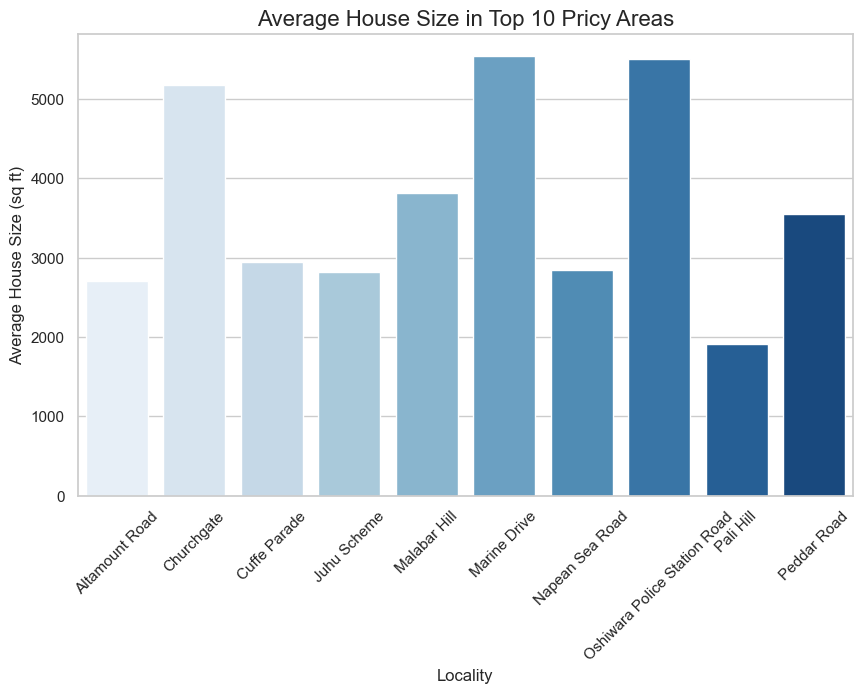

In [308]:

# Average House Size in Top 10 Pricy Areas
top_pricy_areas_with_size = data[data['locality'].isin(top_pricy_areas['locality'])].groupby('locality')['area'].mean().reset_index()
print("Average House Size in Top 10 Pricy Areas:")
print(top_pricy_areas_with_size)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pricy_areas_with_size, x='locality', y='area', palette="Blues")
plt.title("Average House Size in Top 10 Pricy Areas", fontsize=16)
plt.xlabel("Locality", fontsize=12)
plt.ylabel("Average House Size (sq ft)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Preprocessing

In [311]:
# Drop unnecessary columns
data.drop(["title", "latitude", "longitude"], axis=1, inplace=True)
print(f"At this step cleaned {row-data.shape[0]} rows and {colm-data.shape[1]} columns. Shape of data is {data.shape}")

#Update row and col value
row,colm = data.shape[0], data.shape[1]

At this step cleaned 0 rows and 3 columns. Shape of data is (71938, 12)


In [314]:
data.head(5)

,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors
0,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1
1,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1
2,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1
3,51980000,1130,46000.000000,Ville Parle,Mumbai,Apartment,3,3,0,Unfurnished,0,1
4,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1


In [316]:
data.isnull().sum()

price             0
area              0
price_per_sqft    0
locality          0
city              0
property_type     0
bedroom_num       0
bathroom_num      0
balcony_num       0
furnished         0
age               0
total_floors      0
dtype: int64

In [318]:
unique_locations = data['locality'].unique()
print(f"No of Unique Locations in data: {unique_locations.size}")

No of Unique Locations in data: 408


In [320]:
# Handle outliers using IQR method
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"At this step cleaned {row-data.shape[0]} rows and {colm-data.shape[1]} columns. Shape of data is {data.shape}")

#Update row and col value
row,colm = data.shape[0], data.shape[1]

At this step cleaned 23213 rows and 0 columns. Shape of data is (48725, 12)


In [322]:
data.dtypes

price               int64
area                int64
price_per_sqft    float64
locality           object
city               object
property_type      object
bedroom_num         int64
bathroom_num        int64
balcony_num         int64
furnished          object
age                 int64
total_floors        int64
dtype: object

In [324]:
data.head()

,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors
0,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1
1,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1
2,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1
4,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1
5,4900320,720,6806.000000,Ulwe,Mumbai,Apartment,1,1,0,Unfurnished,0,1


In [326]:
# Encode categorical variables
le = LabelEncoder()
data["locality"] = le.fit_transform(data["locality"])
data["city"] = le.fit_transform(data["city"])
data["property_type"] = le.fit_transform(data["property_type"])
data["furnished"] = le.fit_transform(data["furnished"])

In [328]:
data.head()

,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors
0,6600283,757,8719.000000,88,1,0,2,2,0,2,0,1
1,6169841,652,9462.946319,88,1,0,2,2,0,2,0,1
2,4599936,396,11616.000000,55,1,0,1,1,0,2,0,1
4,3915000,435,9000.000000,148,1,0,1,1,0,2,0,1
5,4900320,720,6806.000000,243,1,0,1,1,0,2,0,1


In [330]:
X = data.drop(["price"], axis=1)
y = data["price"]

In [332]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [334]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = model.score(X_test, y_test) * 100  # Accuracy in percentage
    results[name] = {"MSE": mse, "R2 Score": r2, "MAE": mae, "Accuracy": accuracy}

# Display results
print("Model Comparison Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}, MAE = {metrics['MAE']:.2f}, Accuracy = {metrics['Accuracy']:.2f}%")


Model Comparison Results:
Linear Regression: MSE = 4731591144433.55, R2 Score = 0.93, MAE = 1558170.28, Accuracy = 93.19%
Random Forest: MSE = 4975493992.31, R2 Score = 1.00, MAE = 29152.56, Accuracy = 99.99%
Decision Tree: MSE = 22217302658.68, R2 Score = 1.00, MAE = 56322.34, Accuracy = 99.97%
Gradient Boosting: MSE = 144990591225.89, R2 Score = 1.00, MAE = 276409.96, Accuracy = 99.79%
Support Vector Regressor: MSE = 74369243739073.11, R2 Score = -0.07, MAE = 6433205.23, Accuracy = -7.09%


In [335]:
# Additional Metrics for Regression
def extended_metrics(y_true, y_pred, n_features):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1)) / (len(y_true) - n_features - 1)
    evs = 1 - (np.var(y_true - y_pred) / np.var(y_true))
    smape = np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true)) / 2)) * 100
    medae = np.median(np.abs(y_true - y_pred))
    accuracy = model.score(X_test, y_test) * 100  # Accuracy in percentage
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RSS': rss,
        'MAPE': mape,
        'R2 Score': r2,
        'Adj R2': adj_r2,
        'EVS': evs,
        'SMAPE': smape,
        'MedAE': medae,
        'Accuracy':accuracy
    }

# Compute metrics for each model
results_full = {}
n_features = X_test.shape[1]  # Number of predictors
for name, model in models.items():
    predictions = model.predict(X_test)
    metrics = extended_metrics(y_test, predictions, n_features)
    results_full[name] = metrics

# Convert to DataFrame for visualization
results_full_df = pd.DataFrame(results_full).T
print("\nComprehensive Model Performance Metrics:")
results_full_df





Comprehensive Model Performance Metrics:


,MAE,MSE,RMSE,RSS,MAPE,R2 Score,Adj R2,EVS,SMAPE,MedAE,Accuracy
Linear Regression,1.558170e+06,4.731591e+12,2.175222e+06,4.610936e+16,21.807419,0.931868,0.931791,0.931868,23.190001,1.121761e+06,93.186808
Random Forest,2.915256e+04,4.975494e+09,7.053718e+04,4.848619e+13,0.286221,0.999928,0.999928,0.999928,0.276176,1.029138e+04,99.992836
Decision Tree,5.632234e+04,2.221730e+10,1.490547e+05,2.165076e+14,0.498918,0.999680,0.999680,0.999680,0.495285,0.000000e+00,99.968008
Gradient Boosting,2.764100e+05,1.449906e+11,3.807763e+05,1.412933e+15,2.933736,0.997912,0.997910,0.997912,2.912645,1.967743e+05,99.791223
Support Vector Regressor,6.433205e+06,7.436924e+13,8.623760e+06,7.247283e+17,71.873785,-0.070870,-0.072080,0.000560,53.297061,4.997885e+06,-7.087013


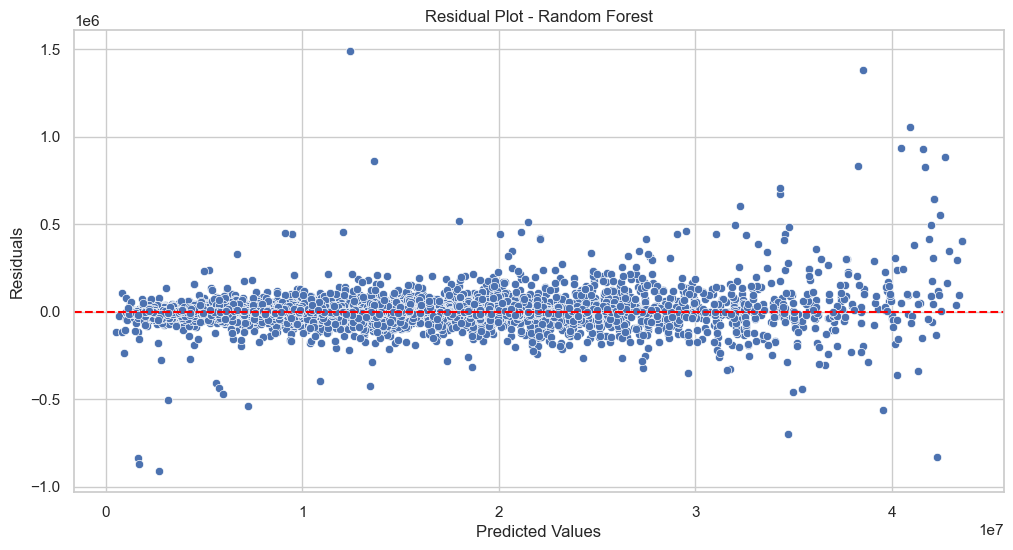

In [350]:
# Residual plot for the best-performing model
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]

best_predictions = best_model.predict(X_test)
residuals = y_test - best_predictions

plt.figure(figsize=(12, 6))
sns.scatterplot(x=best_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residual Plot - {best_model_name}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


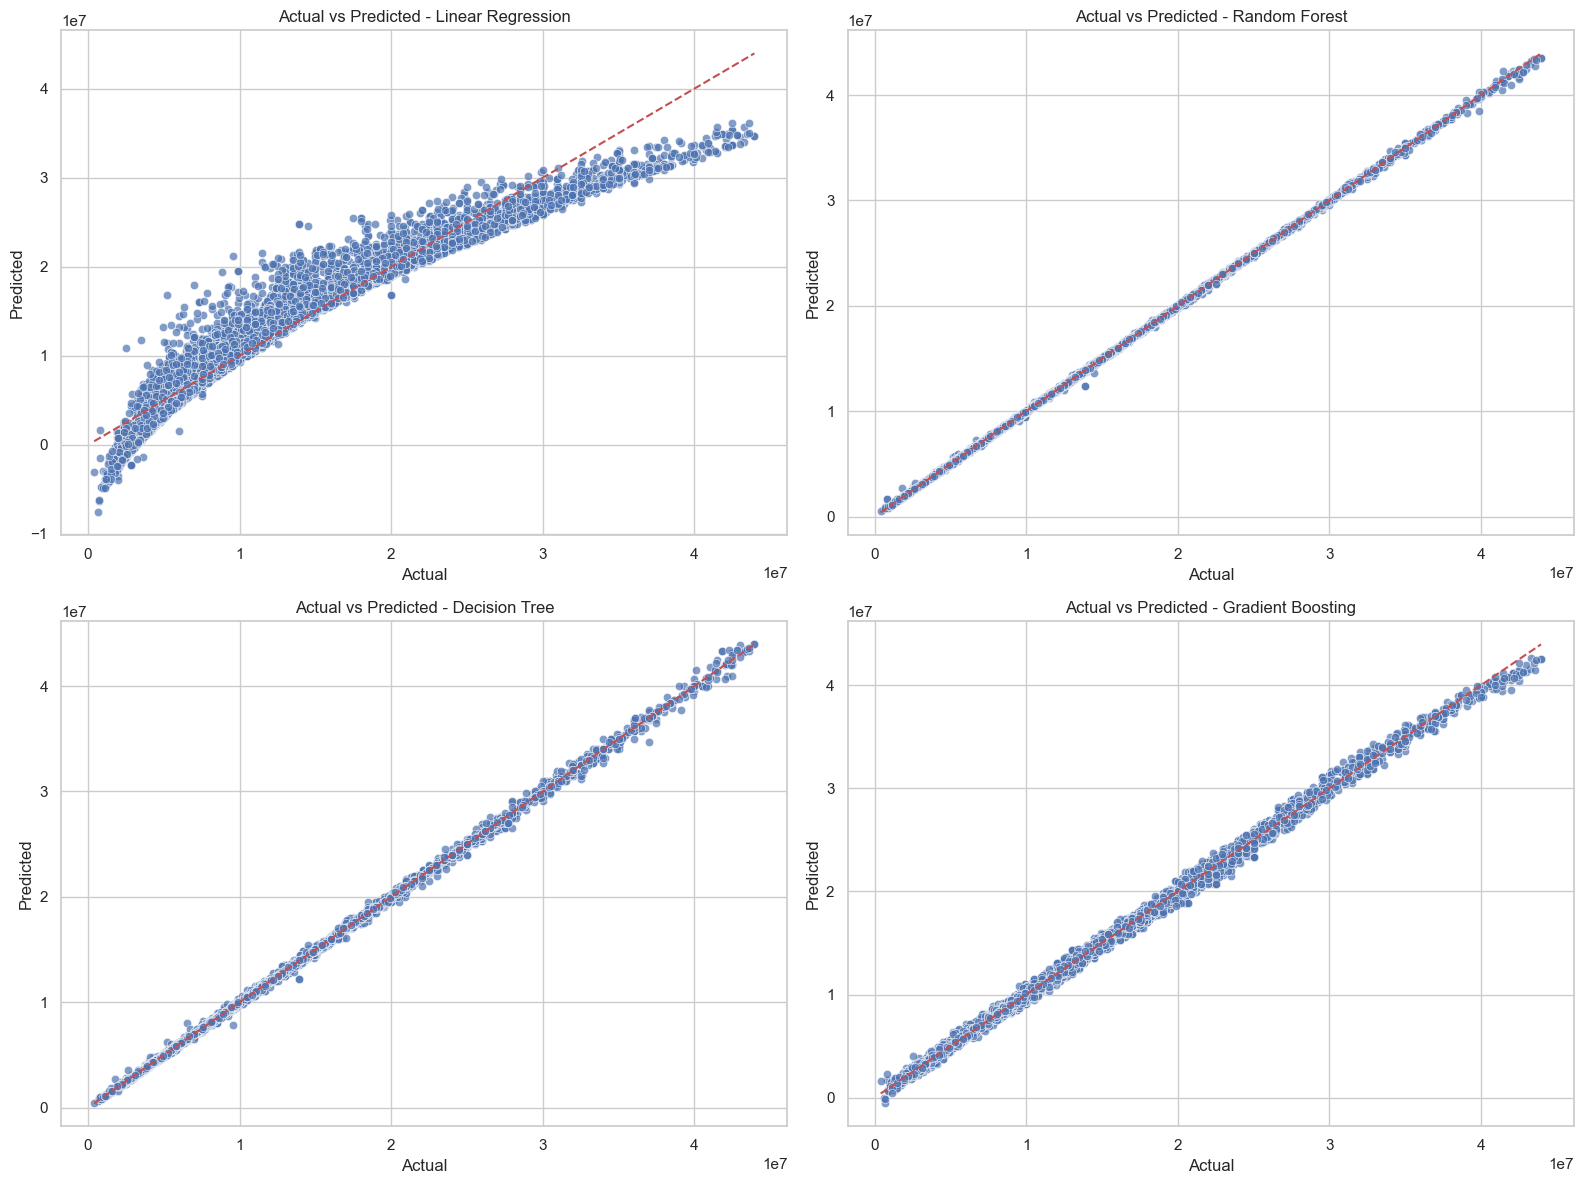

In [359]:
# Visualizing Actual vs Predicted for all models
plt.figure(figsize=(16, 12))
for i, (name, model) in enumerate(models.items()):
    predictions = model.predict(X_test)
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    if i==3:
        break
plt.tight_layout()
plt.show()

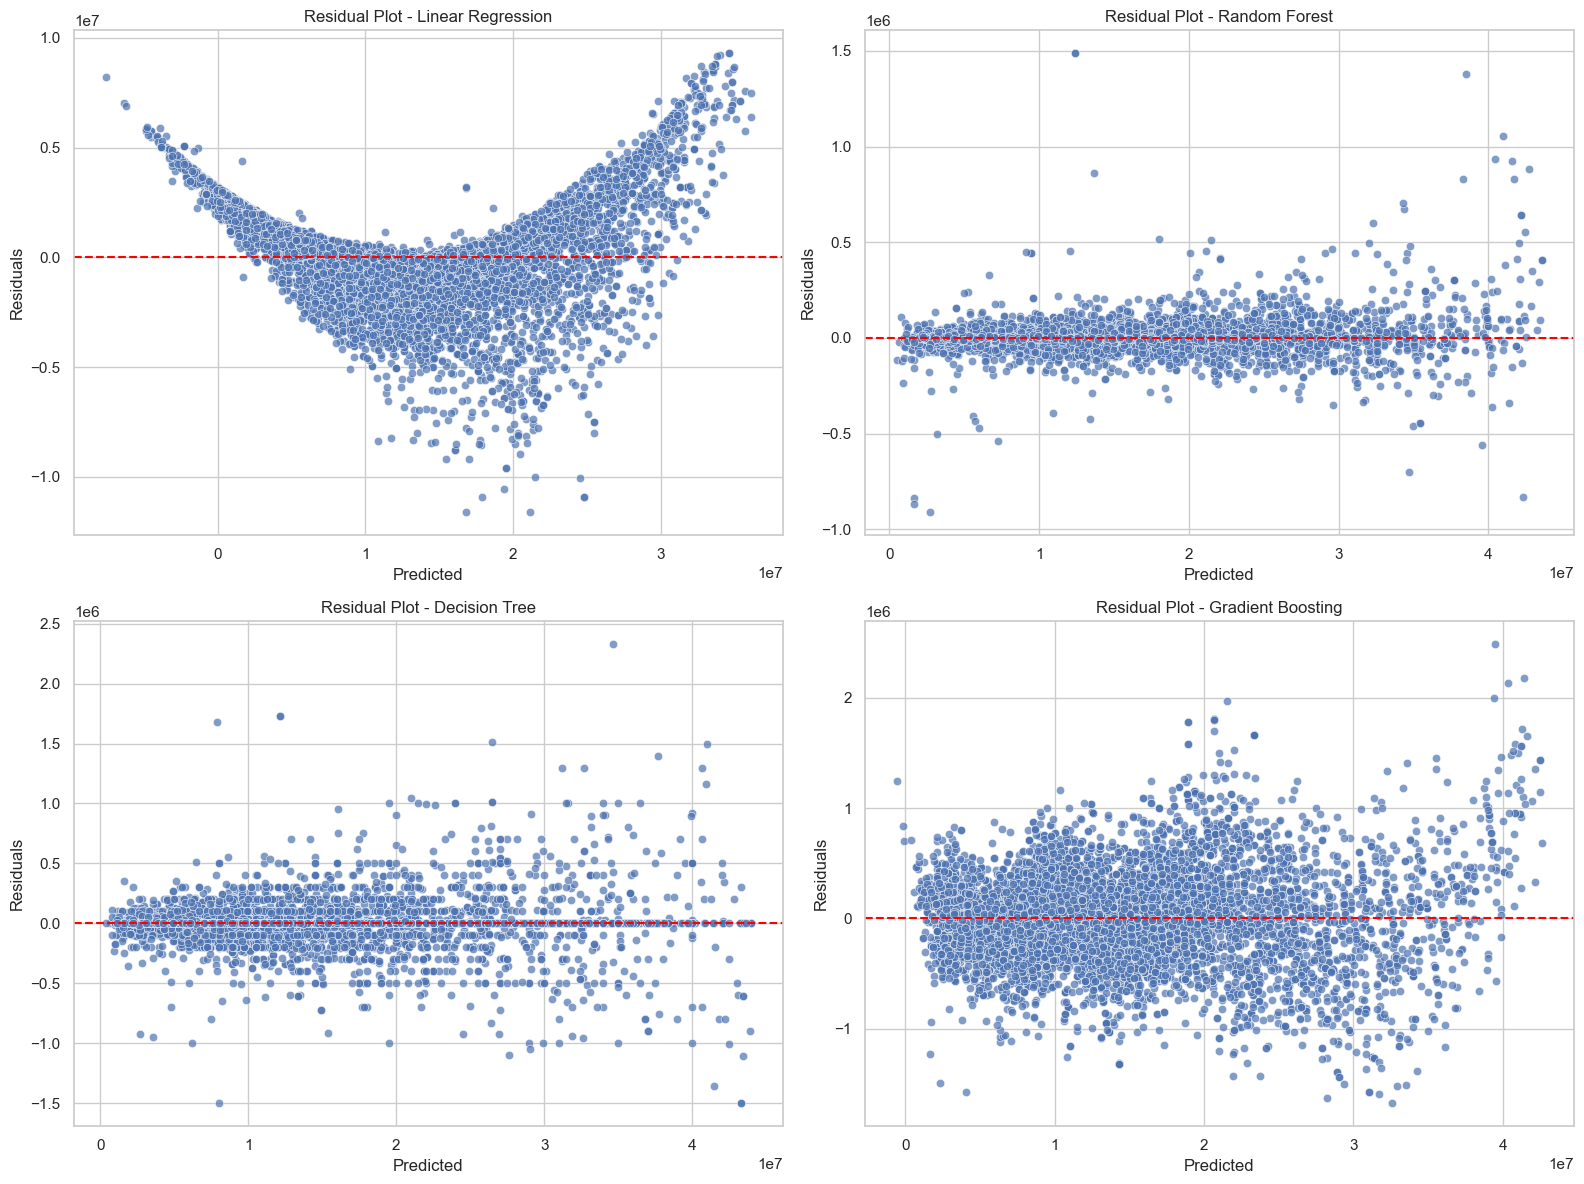

In [361]:
# Residual Plots for all models
plt.figure(figsize=(16, 12))
for i, (name, model) in enumerate(models.items()):
    predictions = model.predict(X_test)
    residuals = y_test - predictions
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=predictions, y=residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    if i==3:
        break
plt.tight_layout()
plt.show()